In [1]:
import pandas as pd
import numpy as np

In [3]:
import os
os.chdir("D:/datasets/")

In [4]:
BMS=pd.read_csv("marketbasket.csv")

In [5]:
BMS.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
BMS.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [7]:
BMS.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.008082,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
BMS.shape

(8523, 10)

In [9]:
list(BMS.columns)

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [10]:
BMS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 665.9+ KB


In [11]:
BMS.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.069670,140.992782,1997.831867,2181.288914
std,4.645008,0.049810,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.785000,0.031114,93.826500,1987.000000,834.247400
50%,12.650000,0.056922,143.012800,1999.000000,1794.331000
75%,16.850000,0.097160,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
BMS.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
BMS.Item_Fat_Content.value_counts().sort_values(ascending=False).plot.bar()

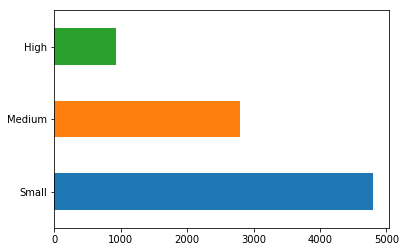

In [14]:
BMS.Outlet_Size.value_counts().sort_values(ascending=False).plot.barh()

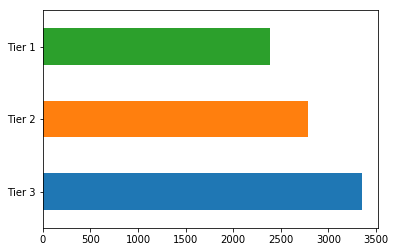

In [15]:
BMS.Outlet_Location_Type.value_counts().sort_values(ascending=False).plot.barh()

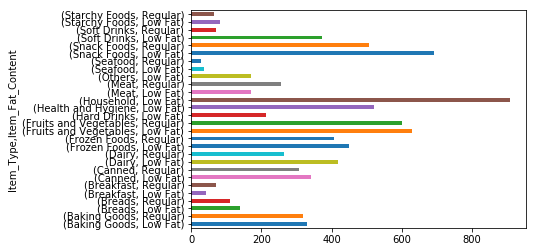

In [16]:
BMS.groupby(['Item_Type','Item_Fat_Content'])['Item_Type'].count().plot.barh()

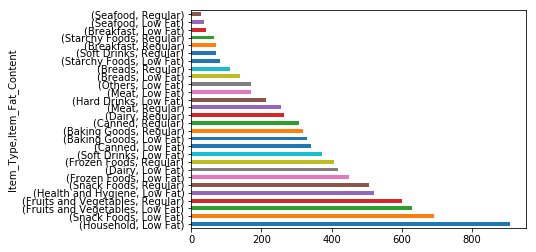

In [17]:
BMS.groupby(['Item_Type','Item_Fat_Content'])['Item_Type'].count()[0:30].sort_values(ascending=False).plot.barh()


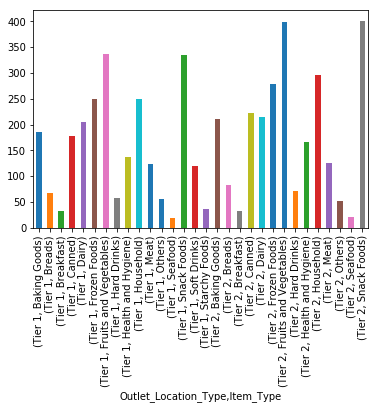

In [18]:
BMS.groupby(['Outlet_Location_Type','Item_Type'])['Item_Type'].count()[0:30].plot.bar()

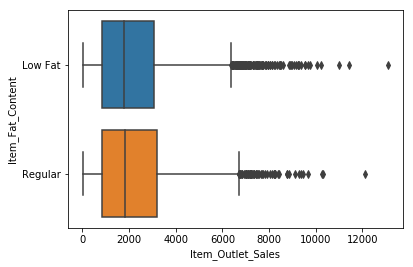

In [21]:
import seaborn as sns
sns.boxplot(data=BMS,y='Item_Fat_Content',x='Item_Outlet_Sales')

In [22]:
BMS.Outlet_Establishment_Year=BMS.Outlet_Establishment_Year.astype('str')

In [23]:
BMS_dum=pd.get_dummies(BMS)

In [24]:
y=BMS_dum.Item_Outlet_Sales.values
y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [27]:
BMS_dum.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [29]:
x=BMS_dum.values
x

array([[9.30000000e+00, 1.60473010e-02, 2.49809200e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.92000000e+00, 1.92782160e-02, 4.82692000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.75000000e+01, 1.67600750e-02, 1.41618000e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.06000000e+01, 3.51862710e-02, 8.51224000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.21000000e+00, 1.45220646e-01, 1.03133200e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.48000000e+01, 4.48782800e-02, 7.54670000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.20,random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model=LinearRegression()


In [33]:

model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:


model.score(x_train,y_train)

0.5637178418402009

In [35]:



model.score(x_test,y_test)

0.5623471801586818

In [36]:
model.score(x,y)

0.5634453296480519

In [67]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=500,random_state=42,min_samples_split=2,max_depth=5)
reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [68]:
reg.score(x_train,y_train)

0.6130091231002747

In [69]:
reg.score(x_test,y_test)

0.5929399244669512

In [70]:
reg.score(x,y)

0.6089763286435335

In [71]:
y_pred=reg.predict(x_test)
y_pred

array([2567.78327222, 1884.91642678, 2087.59641659, ..., 4016.27737645,
        170.60846874, 6017.23184409])

In [72]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

1091.51620691094

In [73]:
submission=pd.DataFrame(data = {'Item_Outlet_Sales':y_pred})

submission.to_csv('Sample_Submission.csv',index = False)